In [6]:
# Python natives
import pickle
import re
from typing import Any

# Data handling
import pandas as pd

# Booster model
import lightgbm as lgb

# Processing tools and evaluation metrics
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, StandardScaler

# Config
eft_file = "../../../../data/BPI17/feature_encodings/EFT/event_based_features.csv"


In [38]:
eft = pd.read_csv(eft_file)
eft.head()

,event_identity,event_current_activitiesCreateapplication,event_current_activitiesSubmit,event_current_activitiesComplete,event_current_activitiesAccept,event_current_activitiesCreateoffer,event_current_activitiesSendmailandonline,event_current_activitiesCall,event_current_activitiesValidate,event_current_activitiesReturn,...,event_activityShortencompletion,event_execution_time,event_elapsed_time,event_remaining_time,event_flow_time,event_synchronization_time,event_sojourn_time,event_previous_object_count,event_previous_type_countGDSRCPT,num_objects
0,0.0,2.36373,-0.374231,-0.168255,-0.294753,2.849851,-0.490923,-0.296284,-0.380742,-0.48128,...,-0.014062,8.24315,-0.707642,1.158222e+07,-0.401356,-0.160294,-0.371514,1.046467,0.0,1.287654
1,0.0,2.36373,-0.374231,-0.168255,-0.294753,-0.350895,-0.490923,-0.296284,-0.380742,-0.48128,...,-0.014062,8.24315,-0.707633,1.158221e+07,-0.401342,-0.159946,-0.371700,1.046467,0.0,1.287654
2,0.0,2.36373,-0.374231,-0.168255,-0.294753,-0.350895,2.036978,-0.296284,-0.380742,-0.48128,...,-0.014062,8.24315,-0.707609,1.158219e+07,-0.401475,-0.160294,-0.371651,1.046467,0.0,-0.681422
3,0.0,-0.42306,-0.374231,-0.168255,-0.294753,-0.350895,-0.490923,3.375142,-0.380742,-0.48128,...,-0.014062,8.24315,-0.707609,1.158219e+07,-0.401489,-0.160210,-0.371716,1.046467,0.0,1.287654
4,0.0,-0.42306,-0.374231,-0.168255,-0.294753,2.849851,-0.490923,-0.296284,-0.380742,-0.48128,...,-0.014062,8.24315,1.371127,9.425207e+06,3.131831,-0.160294,3.719311,2.150499,0.0,1.287654


In [40]:
scaler = StandardScaler()
eft_values = scaler.fit_transform(eft.values)
eft = pd.DataFrame(eft_values,columns=eft.columns)
eft

,event_identity,event_current_activitiesCreateapplication,event_current_activitiesSubmit,event_current_activitiesComplete,event_current_activitiesAccept,event_current_activitiesCreateoffer,event_current_activitiesSendmailandonline,event_current_activitiesCall,event_current_activitiesValidate,event_current_activitiesReturn,...,event_activityShortencompletion,event_execution_time,event_elapsed_time,event_remaining_time,event_flow_time,event_synchronization_time,event_sojourn_time,event_previous_object_count,event_previous_type_countGDSRCPT,num_objects
0,0.0,2.352893,-0.372822,-0.168318,-0.295065,2.853465,-0.489847,-0.296627,-0.381267,-0.480168,...,-0.013891,8.215623,-0.705739,8.671991,-0.401750,-0.160523,-0.372103,1.059050,0.0,1.292656
1,0.0,2.352893,-0.372822,-0.168318,-0.295065,-0.350451,-0.489847,-0.296627,-0.381267,-0.480168,...,-0.013891,8.215623,-0.705730,8.671984,-0.401736,-0.160176,-0.372290,1.059050,0.0,1.292656
2,0.0,2.352893,-0.372822,-0.168318,-0.295065,-0.350451,2.041452,-0.296627,-0.381267,-0.480168,...,-0.013891,8.215623,-0.705706,8.671963,-0.401869,-0.160523,-0.372241,1.059050,0.0,-0.681345
3,0.0,-0.425009,-0.372822,-0.168318,-0.295065,-0.350451,-0.489847,3.371233,-0.381267,-0.480168,...,-0.013891,8.215623,-0.705706,8.671963,-0.401883,-0.160440,-0.372306,1.059050,0.0,1.292656
4,0.0,-0.425009,-0.372822,-0.168318,-0.295065,2.853465,-0.489847,-0.296627,-0.381267,-0.480168,...,-0.013891,8.215623,1.375277,6.872730,3.132311,-0.160523,3.725331,2.171154,0.0,1.292656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393926,0.0,-0.425009,-0.372822,5.941125,-0.295065,-0.350451,-0.489847,-0.296627,-0.381267,-0.480168,...,-0.013891,-1.259781,-0.707109,-0.624823,-0.401925,-0.160523,-0.372306,-1.165159,0.0,-0.681345
393927,0.0,-0.425009,-0.372822,-0.168318,3.389089,-0.350451,-0.489847,-0.296627,-0.381267,-0.480168,...,-0.013891,-1.259781,-0.285802,-0.989088,0.313602,-0.160523,0.457285,-1.165159,0.0,-0.681345
393928,0.0,-0.425009,-0.372822,-0.168318,-0.295065,2.853465,-0.489847,-0.296627,-0.381267,-0.480168,...,-0.013891,-1.259781,-0.285615,-0.989250,-0.401607,-0.160523,-0.371937,-0.053054,0.0,1.292656
393929,0.0,-0.425009,-0.372822,-0.168318,-0.295065,-0.350451,2.041452,-0.296627,-0.381267,-0.480168,...,-0.013891,-1.259781,-0.285604,-0.989259,-0.401907,-0.160523,-0.372285,-0.053054,0.0,-0.681345


In [41]:
eft = eft.drop("event_execution_time", axis=1)

In [42]:
target_var = "event_remaining_time"
# make train test split
X, y = eft.drop(target_var, axis=1), eft[target_var]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_valid, label=y_valid)

In [43]:
params = {
    "objective": "regression",
    "metric": ["mse", "mae", "mape", "rmse"],
}
bst = lgb.train(
    params,
    train_data,
    # num_boost_round=5000,
    valid_sets=[valid_data],
    # callbacks=[lgb.early_stopping(50)],
)


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.122078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1369
[LightGBM] [Info] Number of data points in the train set: 315144, number of used features: 85
[LightGBM] [Info] Start training from score 0.000423
[1]	valid_0's l2: 0.913235	valid_0's l1: 0.774583	valid_0's mape: 0.663191	valid_0's rmse: 0.955633
[2]	valid_0's l2: 0.847475	valid_0's l1: 0.743839	valid_0's mape: 0.635243	valid_0's rmse: 0.920584
[3]	valid_0's l2: 0.794176	valid_0's l1: 0.717344	valid_0's mape: 0.611262	valid_0's rmse: 0.891165
[4]	valid_0's l2: 0.751041	valid_0's l1: 0.694401	valid_0's mape: 0.590585	valid_0's rmse: 0.866626
[5]	valid_0's l2: 0.716011	valid_0's l1: 0.674421	valid_0's mape: 0.572639	valid_0's rmse: 0.846174
[6]	valid_0's l2: 0.687657	valid_0's l1: 0.65701	valid_0's mape: 0.557065	valid_0's rmse: 

In [74]:
final_mse = 0.559662
final_mae = 0.518892
denormalize = lambda x: scaler.inverse_transform([x] * (eft.shape[1] + 1))[
    eft.columns.get_loc(target_var) + 1
]
print(f"Denormalized MAE: {denormalize(final_mae)}")
print(f"Denormalized MSE: {denormalize(final_mse)}")

Denormalized MAE: 1808020.4915141894
Denormalized MSE: 1856896.8875168387


In [44]:
import shap
shap_values = shap.TreeExplainer(bst).shap_values(X_valid)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


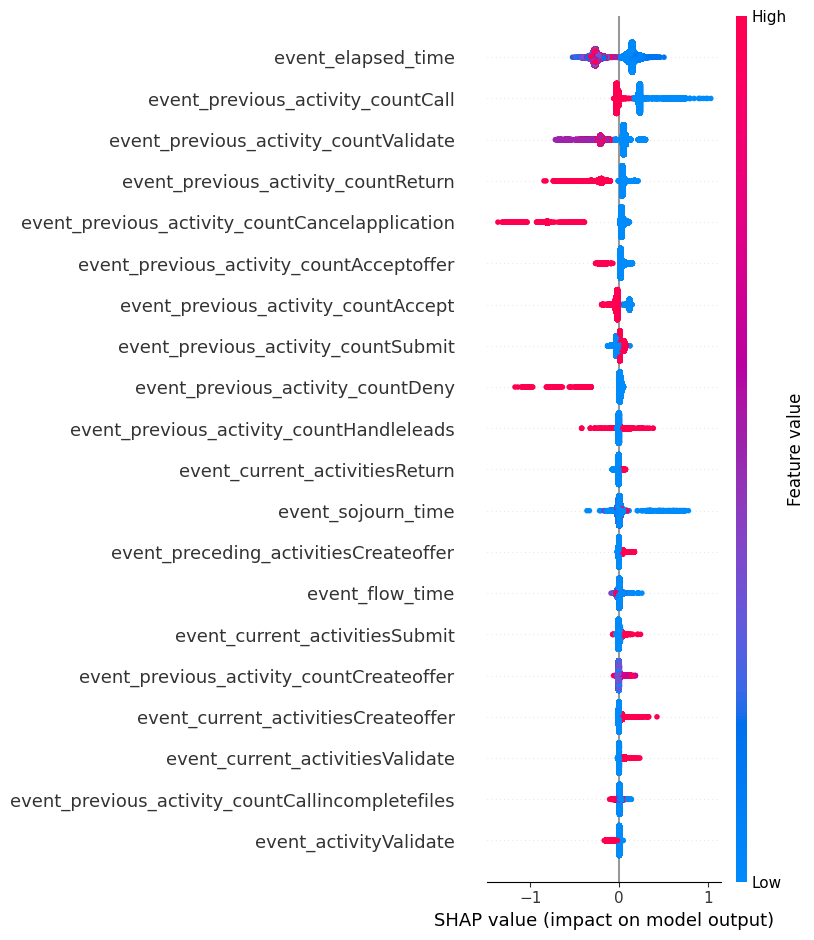

In [45]:
shap.summary_plot(shap_values, X_valid)

1856896.8875168387

86